<a href="https://colab.research.google.com/github/Vyshnavi2k5/Aiml/blob/main/Lab-06ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [9]:
df=pd.read_table("/titanic.csv",sep=',', index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [11]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
l=list(df.columns)
l[0:len(l)-2]

['Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare']

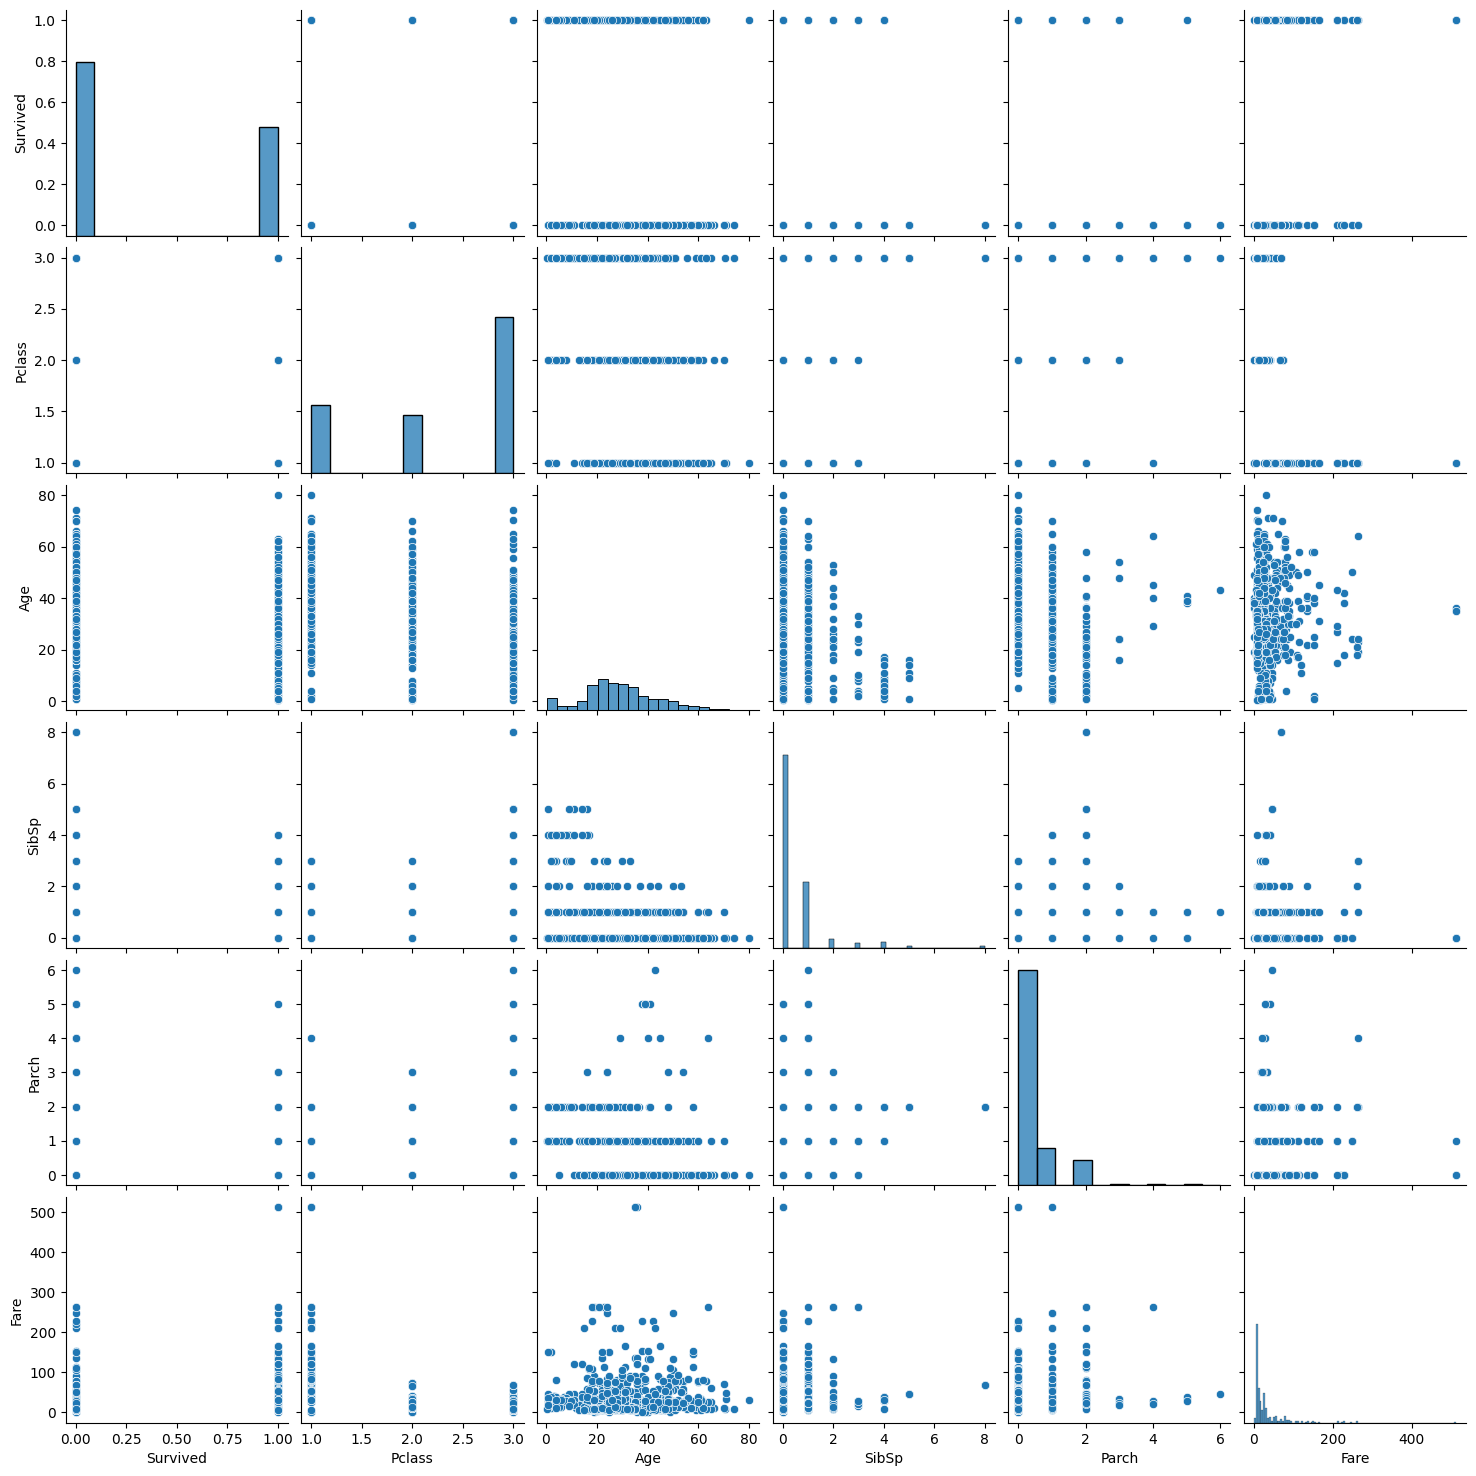

In [13]:
sns.pairplot(df)

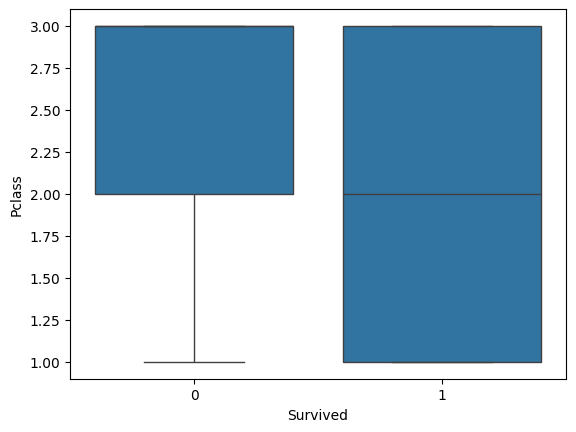

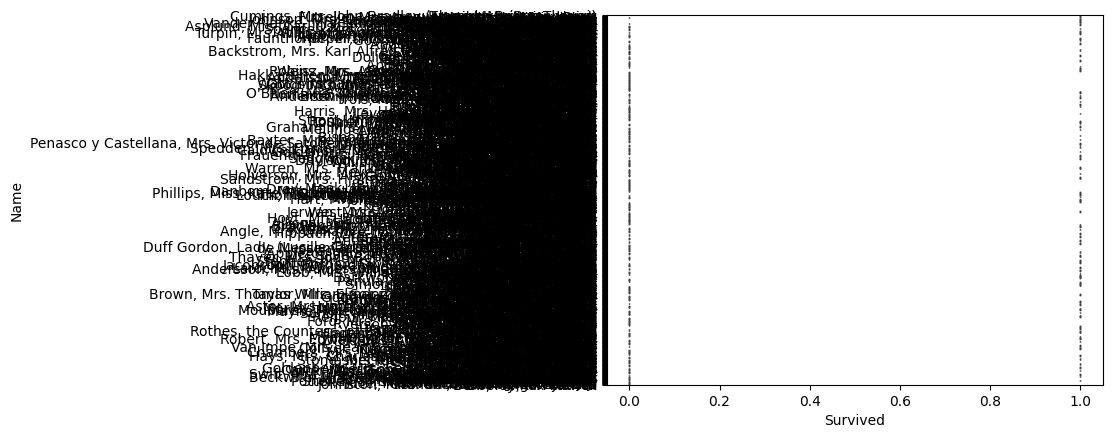

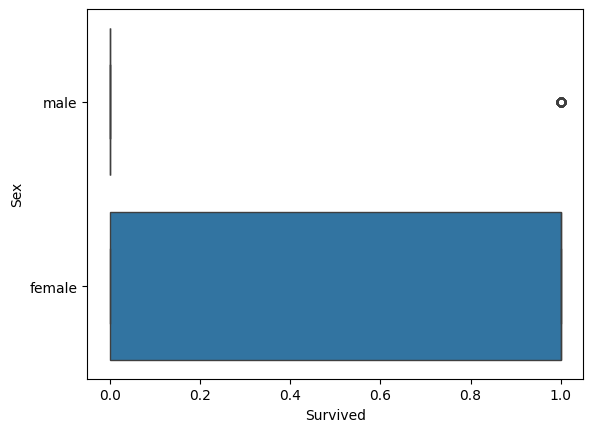

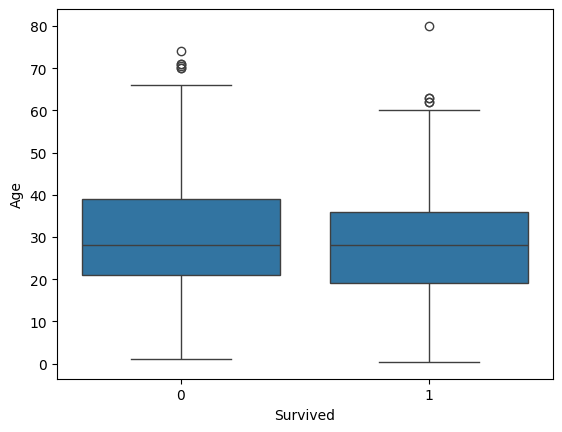

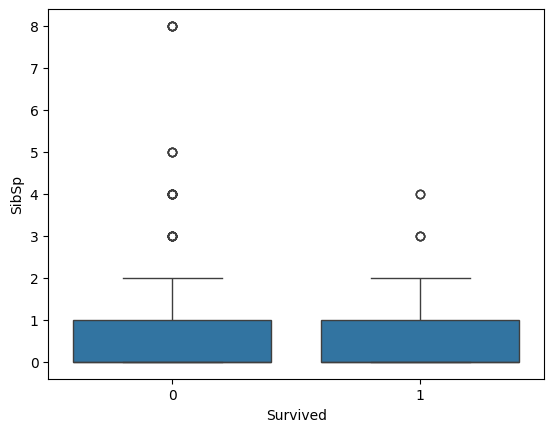

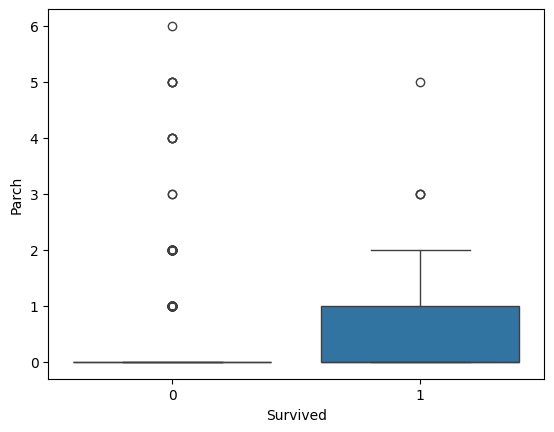

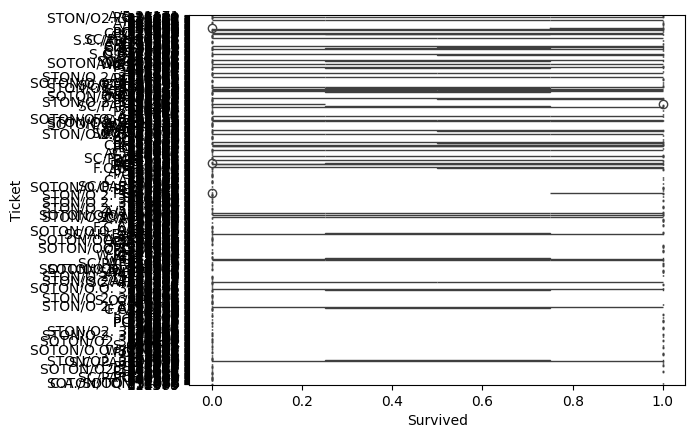

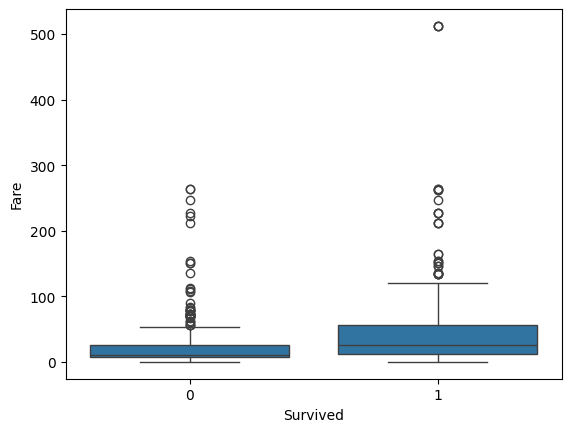

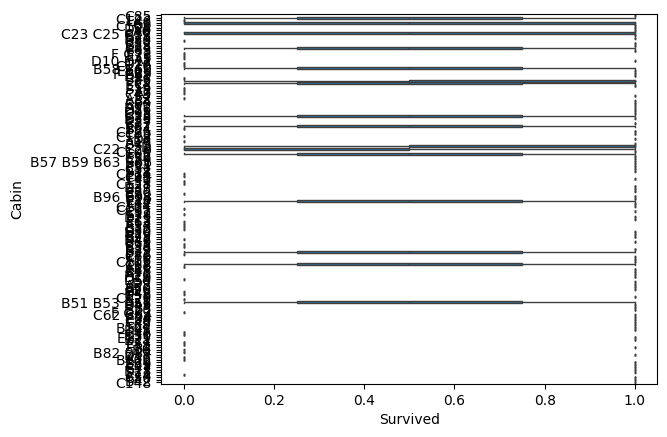

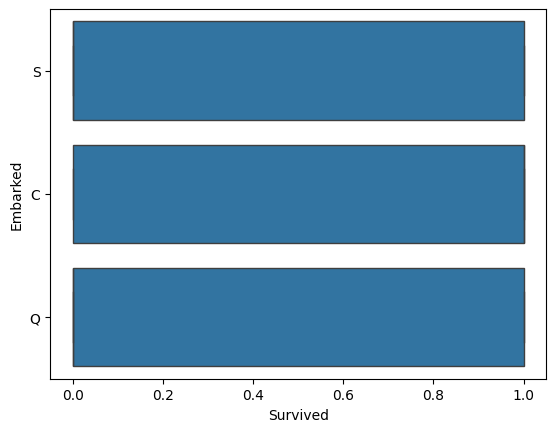

<Figure size 640x480 with 0 Axes>

In [14]:

import seaborn as sns
import matplotlib.pyplot as plt

l = list(df.columns)
target_column_name = 'Survived'

for i in range(len(l)):
    if l[i] != target_column_name:
        sns.boxplot(x=target_column_name, y=l[i], data=df)
        plt.figure()

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [16]:

column_to_drop = 'Survived'
numeric_features = df.drop(column_to_drop, axis=1).select_dtypes(include=['number'])
scaler.fit(numeric_features)
scaled_features = scaler.transform(numeric_features)
print(df.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [17]:
df_feat = pd.DataFrame(scaled_features, columns=numeric_features.columns)
df_feat.head()

,Pclass,Age,SibSp,Parch,Fare
0,0.827377,-0.530377,0.432793,-0.473674,-0.502445
1,-1.566107,0.571831,0.432793,-0.473674,0.786845
2,0.827377,-0.254825,-0.474545,-0.473674,-0.488854
3,-1.566107,0.365167,0.432793,-0.473674,0.420730
4,0.827377,0.365167,-0.474545,-0.473674,-0.486337


In [21]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split # Importing the necessary function

y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, y, test_size=0.30, random_state=101
)

In [24]:
!pip install scikit-learn
from sklearn.impute import SimpleImputer # Import SimpleImputer from sklearn.impute
from sklearn.model_selection import train_test_split # Importing the necessary function
import pandas as pd
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

y = df['Survived']
imputer = SimpleImputer(strategy='mean')
scaled_features = imputer.fit_transform(scaled_features)

X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, y, test_size=0.30, random_state=101
)


knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
pred=knn.predict(X_test)



from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix
conf_mat=confusion_matrix(y_test,pred)
print(conf_mat)

[[115  39]
 [ 58  56]]


In [26]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.66      0.75      0.70       154
           1       0.59      0.49      0.54       114

    accuracy                           0.64       268
   macro avg       0.63      0.62      0.62       268
weighted avg       0.63      0.64      0.63       268



In [27]:
print("Misclassification error rate:",round(np.mean(pred!=y_test),3))

Misclassification error rate: 0.362
